# Step 0: Importing the libraries

In [115]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Defining the area

In [119]:
center_x = 0
center_y = 0
center_z = 0

radius  = 5000

print("Total area is = " + str(radius*radius*math.pi))

Total area is = 78539816.33974482


# Step 2: FSS class

In [120]:
# Creating the FSS class
class FSS:
  def __init__(self, FSS_x, FSS_y, FSS_z):
    self.FSS_x = FSS_x
    self.FSS_y = FSS_y
    self.FSS_z = FSS_z


  def FSS_co_ordinate(self):
    print("Co-ordinate of FSS is = " + str(self.FSS_x) + "," + str(self.FSS_y) + "," + str(self.FSS_z))
    

    
# Creating an FSS object
fss1 = FSS(0,0,0)
fss1.FSS_co_ordinate()

Co-ordinate of FSS is = 0,0,0


# Step 3: BS Class

In [121]:
class BS:
  def __init__(self, radius, max_height, carr_freq):
    self.radius = radius
    self.max_height = max_height
    self.carr_freq = carr_freq

  def BS_random_co_ordinates(self):

    BS_x = random.randint(-4000,4000) + 1000*random.random()
    BS_y = random.randint(-4000,4000) + 1000*random.random()
    BS_z = random.randint(0,35)
    
    return BS_x, BS_y, BS_z
 
  def UE_random_co_ordinates(self):
    UE_x = random.randint(-4000,4000) + 1000*random.random()
    UE_y = random.randint(-4000,4000) + 1000*random.random()
    UE_z = random.uniform (0,1.5)
    
    return UE_x, UE_y, UE_z

BS_X= []
BS_Y= []
BS_Z= []
for i in range (4):
    bs1 = BS(radius, max_height=35, carr_freq=12e3)
    x,y,z = bs1.BS_random_co_ordinates()
    BS_X.append(x)
    BS_Y.append(y)
    BS_Z.append(z)
    print ("Bs Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z))
print(BS_X,BS_Y,BS_Z)

UE_X= []
UE_Y= []
UE_Z= []
for i in range (10):
    ue1 = BS(radius, max_height=1.5, carr_freq=12e3)
    x,y,z = ue1.UE_random_co_ordinates()
    UE_X.append(x)
    UE_Y.append(y)
    UE_Z.append(z)
    print("UE Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z))
print(UE_X,UE_Y,UE_Z)

Bs Co-ordinates=-2990.623215163182,4559.382427811091,2
Bs Co-ordinates=516.401922460006,-1156.0964844739906,11
Bs Co-ordinates=1159.313693273226,607.2255834736654,18
Bs Co-ordinates=-940.9251250156866,-2271.2053651506913,9
[-2990.623215163182, 516.401922460006, 1159.313693273226, -940.9251250156866] [4559.382427811091, -1156.0964844739906, 607.2255834736654, -2271.2053651506913] [2, 11, 18, 9]
UE Co-ordinates=2223.1989262731777,2566.29208165439,0.16663605176818458
UE Co-ordinates=-2443.580628095263,-1856.0028494985359,0.285899033577453
UE Co-ordinates=2778.137556672265,660.7869940120264,0.08253064542197647
UE Co-ordinates=1299.1239451787228,321.42400055940914,1.2009484512719086
UE Co-ordinates=2182.769459658305,3442.5752361601753,1.209153580775075
UE Co-ordinates=3600.4655443966044,1466.8601250826562,0.08266174429436907
UE Co-ordinates=-316.12487352582514,1655.9345016903735,0.6852958767932982
UE Co-ordinates=265.09020337257925,3703.0055701917026,0.5036163683183259
UE Co-ordinates=3871.

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot

In [123]:
BS_X=np.array(BS_X)
BS_Y=np.array(BS_Y)
BS_Z=np.array(BS_Z)

UE_X=np.array(UE_X)
UE_Y=np.array(UE_Y)
UE_Z=np.array(UE_Z)


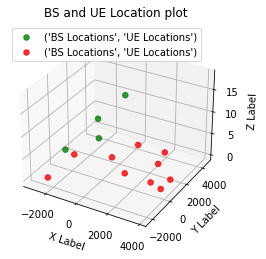

In [124]:
groups = ("BS Locations", "UE Locations")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(BS_X,BS_Y,BS_Z,alpha=0.8, s=30,color= 'green',label=groups)
ax.scatter(UE_X,UE_Y,UE_Z,alpha=0.8, s=30,color= 'red',label=groups)
plt.legend(loc=2)
plt.title('BS and UE Location plot')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
pathloss_UMa=np.empty([0])
pathloss_UMi=np.empty([0])
pathloss_RMa=np.empty([0])
distance_UMa=np.empty([0])
distance_UMi=np.empty([0])
distance_RMa=np.empty([0])

In [56]:
  def path_loss_UMi(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((BS_x-UE_y)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log(d_3D)+20*math.log(fc)-9.5*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log(d_3D)+22.4+21.3*math.log(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
##Loss Probability:
##d_2D <=18m, PrLOS=1

##18m<d_2D:
    PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))
    
##path_loss 
    path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi,d_2D

In [110]:
data1 = ['BS_X', 'BS_Y', 'BS_Z' ]
data2= ['UE_X','UE_Y','UE_Z']
for i in range(len(data1)):
    for j in range (len(data2)):
        pathlossumi,distance= path_loss_UMi(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for umi", pathlossumi, "for distance",distance)

        
        

pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697
pathloss for umi 466.1883256534911 for distance 1001.868332597697


In [67]:
  def path_loss_UMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log(d_3D)+20*math.log(fc)-9*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log(d_3D)+20*math.log(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)

##Loss Probability:
##if d_2D <=18m then PrLOS=1.
##18m<d_2D:
## if hUT<=13m then ChUT=0, and if (13m< hUT<=23m),then ChUT=((hUT-13)/10).^1.5
    ChUT=0
    PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))

##Path Loss
    path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa, d_2D

In [89]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossuma,distance= path_loss_UMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for uma", pathlossuma, "for distance", distance)
        pathloss_UMa=np.append(pathloss_UMa,pathlossuma)
        distance_UMa=np.append(distance_UMa,distance)
        print(pathloss_UMa,distance_UMa)

pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727] [2196.28192553]
pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727 501.80845727] [2196.28192553 2196.28192553]
pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727 501.80845727 501.80845727] [2196.28192553 2196.28192553 2196.28192553]
pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727 501.80845727 501.80845727 501.80845727] [2196.28192553 2196.28192553 2196.28192553 2196.28192553]
pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727 501.80845727 501.80845727 501.80845727 501.80845727] [2196.28192553 2196.28192553 2196.28192553 2196.28192553 2196.28192553]
pathloss for uma 501.8084572717343 for distance 2196.281925525464
[501.80845727 501.80845727 501.80845727 501.80845727 501.80845727
 501.80845727] [2196.28192553 2196.28192553 2196.28192553 2196.28192553 2196.28192553
 2196.28192553]
pathloss fo

In [71]:
 def path_loss_RMa(BS_X,BS_Y,BS_Z,UE_X,UE_Y,UE_Z):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLUMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log(W)+7.5*math.log(h)-(24.37-3.7*(h/hBs)**2)*math.log(hBs)+(43.42-3.1*math.log(hBs))*(math.log(d_3D)-3)+20*math.log(fc)-(3.2*(math.log(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)

##Loss Probability:
##if d_2D <=10m, PrLOS=1
## if 10m<d_2D:
    PrLOSrma=math.exp(-((d_2D-10)/1000))

##PathLoss:
    path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa, d_2D

pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss for rma 501.8084572717343 for distance 2196.281925525464
pathloss f

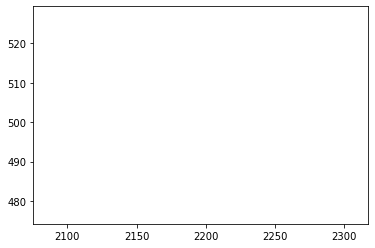

In [100]:
for i in range(len(BS_X)):
    for j in range (len(UE_X)):
        pathlossrma, distance= path_loss_UMa(BS_X[i],BS_Y[i],BS_Z[i],UE_X[j],UE_Y[j],UE_Z[j])
        print("pathloss for rma", pathlossrma, "for distance", distance)
        
        pathloss_RMa=np.append(pathloss_RMa,pathlossrma)
        distance_RMa=np.append(distance_RMa,distance)
print(pathloss_RMa,distance_RMa)

plt.plot (distance_RMa,pathloss_RMa, label='RMa')
plt.show()

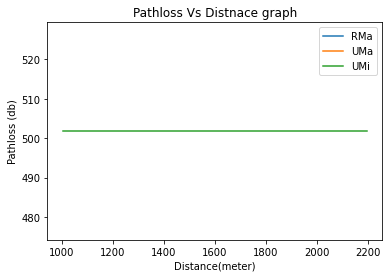

In [98]:
plt.plot (distance_RMa,pathloss_RMa, label='RMa')
plt.plot (distance_UMa,pathloss_UMa, label='UMa')
plt.plot (distance_UMi,pathloss_UMi, label='UMi')
plt.title('Pathloss Vs Distnace graph')
plt.xlabel ('Distance(meter)')
plt.ylabel ('Pathloss (db)')
plt.legend()
plt.show()


In [13]:
for i in range (4):
    bs1 = BS(radius, max_height=35, carr_freq=12e3)
    BS_x, BS_y, BS_z = bs1.BS_random_co_ordinates()
    print ("Bs Co-ordinates=" +str (BS_x)+ "," + str(BS_y)+ "," + str(BS_z))
    
    path_loss_UMi= bs1.path_loss_UMi()
    print ("Path Loss for UMi = " +str(path_loss_UMi))
    
    path_loss_UMa= bs1.path_loss_UMa()
    print ("Path Loss for UMa = " +str(path_loss_UMa))
    
    path_loss_RMa= bs1.path_loss_RMa()
    print ("Path Loss for RMa = " +str(path_loss_RMa))
     
    
print ("\n")
    
for i in range (10):
    ue1 = BS(radius, max_height=1.5, carr_freq=12e3)
    UE_x,  UE_y, UE_z = ue1.UE_random_co_ordinates()
    print("UE Co-ordinates=" +str (UE_x)+ "," + str(UE_y)+ "," + str(UE_z))
    
    path_loss_UMi= ue1.path_loss_UMi()
    print ("Path Loss for UMi = " +str(path_loss_UMi))
    
    path_loss_UMa= ue1.path_loss_UMa()
    print ("Path Loss for UMa = " +str(path_loss_UMa))
    
    path_loss_RMa= ue1.path_loss_RMa()
    print ("Path Loss for RMa = " +str(path_loss_RMa))


import matplotlib.pyplot as plt
d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
y1= path_loss_UMi
y2= path_loss_UMa
y3= path_loss_RMa
plt.plot (d_2D,y1, label='UMi')
plt.plot (d_2D,y2, label='UMa')
plt.plot (d_2D,y3, label='RMa')
plt.xlabel ('Distance(meter)')
plt.ylabel ('Pathloss (db)')
plt.legend()
plt.show()
    